In [1]:
# Yooo lets see how this goes 
# btw, using FirstGenPokemon.csv and unzipped pokemon images named "dataset"

In [46]:
# Importing the csv file into a dataframe

import pandas as pd  # moves column over by 1
attributes = pd.read_csv("FirstGenPokemon.csv")
attributes.head() 

,Number,Name,Types,Type1,Type2,Height(m),Weight(kg),Male_Pct,Female_Pct,Capt_Rate,...,Poison_Dmg,Ground_Dmg,Flying_Dmg,Psychic_Dmg,Bug_Dmg,Rock_Dmg,Ghost_Dmg,Dragon_Dmg,Evolutions,Legendary
0,1,Bulbasaur,2,grass,poison,0.7,6.9,87.5,12.5,45,...,1.0,1.0,2.0,2.0,4.0,1.0,1,1,2,0
1,2,Ivysaur,2,grass,poison,1.0,13.0,87.5,12.5,45,...,1.0,1.0,2.0,2.0,4.0,1.0,1,1,2,0
2,3,Venusaur,2,grass,poison,2.0,100.0,87.5,12.5,45,...,1.0,1.0,2.0,2.0,4.0,1.0,1,1,2,0
3,4,Charmander,1,fire,None,0.6,8.5,87.5,12.5,45,...,1.0,2.0,1.0,1.0,0.5,2.0,1,1,2,0
4,5,Charmeleon,1,fire,None,1.1,19.0,87.5,12.5,45,...,1.0,2.0,1.0,1.0,0.5,2.0,1,1,2,0


In [47]:
# Source: https://stackoverflow.com/questions/71009215/how-to-make-a-dataframe-from-images-python-pandas
# Imports the images in the folder "dataset" into a dataframe

import pandas as pd
from pathlib import Path

image_dir_path = 'dataset'
paths = [path.parts[-3:] for path in
         Path(image_dir_path).rglob('*.png')]
image_dataset = pd.DataFrame(data=paths, columns=['dataset', 'Pokemon', 'Images'])
image_dataset.head()

,dataset,Pokemon,Images
0,dataset,Squirtle,00000170.png
1,dataset,Squirtle,00000206.png
2,dataset,Squirtle,00000004.png
3,dataset,Squirtle,00000010.png
4,dataset,Squirtle,00000005.png


In [8]:
# -------------------------------------------------------------

In [12]:
# pip install opencv-python

     |████████████████████████████████| 46.4 MB 633 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

# Greyscaling our image
img = cv2.imread("dataset/Zubat/fccfe4de71a543349378b09d91d3f745.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reshaping out image, and adding it to one column of the dataframe "df"
df = pd.DataFrame()

img2 = img.reshape(-1)
df['Original Image'] = img2

In [95]:
#shows the image in color
#plt.imshow(gray, cmap = "gray") 

#shows the image in color
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [96]:
#Generate Gabor features

num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                    #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
#                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

In [98]:
# Variables of the dataframe 

Y = df["Original Image"].values
X = df.drop(["Original Image"], axis=1)

In [102]:
# Splitting data into test and train datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [103]:
# Training a model through Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [104]:
# Using the model to predict 

model.fit(X_train, y_train)

#Test prediction on training data. 
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

In [92]:
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy on training data =  0.9742231053706464
Accuracy =  0.6996025832091406


In [108]:
import pickle

filename = "zubat_model"
pickle.dump(model, open(filename, "wb"))

load_model = pickle.load(open(filename, "rb"))
result = load_model.predict(X)

In [109]:
segmented = result.reshape((img.shape))

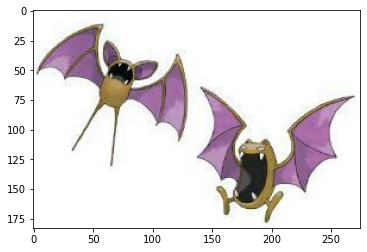

In [111]:

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')

In [ ]:
# -------------------------------------------------------------

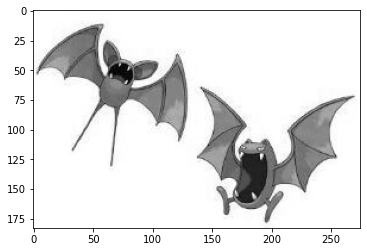

In [115]:
#shows the image in color
plt.imshow(gray, cmap = "gray") 

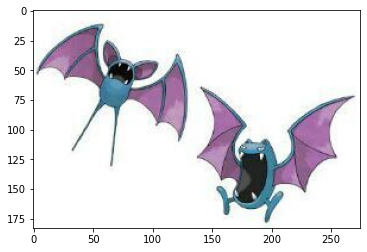

In [116]:


#shows the image in color
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
# Splits the dataframe into training and testing data

from sklearn.model_selection import train_test_split

                                                    # I choose small size values to make it run faster
name_train, name_test, image_train, image_test = \
train_test_split(df['Pokemon'], df['Images'], test_size=0.01, train_size = 0.2) 


Potentially Helpful Resources: 

https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/

https://medium.com/analytics-vidhya/create-your-own-real-image-dataset-with-python-deep-learning-b2576b63da1e

https://pub.towardsai.net/how-to-create-a-new-custom-dataset-from-images-9b95977964ab

And some comment I found:
    "As a side note (in case you are ever tempted): never load the actual images into a pandas dataframe. It is best to load them as NumPy arrays or something similar. Pandas DataFrames are in essence just annotated NumPy arrays anyway." Perhaps we can,
    https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

^^ create our own dataset?

In [ ]:
# This doesn't work as the image is just an address

import csv 
image_train = image_train/255.0

In [ ]:
# Normalization

image_train = image_train/255.0
image_test = image_test/255.0